#W12 - Class Assignment

Evelin Alim Natadjaja / 0706022310021

## Import Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [38]:
pip install kneed

## Data Understanding & Preparation

### Load Dataset

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [40]:
# Shape (rows, columns)
print("Shape:", df.shape)

Shape: (300, 16)


In [41]:
# Data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [42]:
# Basic descriptive statistics (mean, std, min, max, etc.)
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


### Check for missing values

In [43]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


### Check Unique Value

In [44]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        print(f"Number of unique values in '{column}': {df[column].nunique()}")

Number of unique values in 'student_id': 300
Unique values in 'name': ['Kristina Vaughan' 'Rodney Daniels' 'Jose Nash' 'Nicole Martin'
 'Shelby Smith' 'Austin Griffin' 'Crystal Jordan' 'Sandra Patterson'
 'Rachael Miles' 'Matthew Rice' 'Lawrence Powers' 'Joshua Henry'
 'Jamie Jones' 'Rita Olson' 'Matthew Williams' 'Terry Little'
 'Doris Larson' 'Gregg Gonzales' 'Pamela Jones' 'Mark Allen'
 'Sherri Wheeler' 'Jeffrey Martin' 'Sandra Smith' 'Colton Bradley'
 'Amy Johnson' 'Ryan Lyons' 'Dr. Andrew Chang' 'Michael Williamson Jr.'
 'Jessica Hart' 'Stephanie Gonzales' 'Dr. Jamie Mclaughlin' 'Diana Martin'
 'Jessica Russell' 'Christopher Buchanan' 'Sean Bates' 'Stephen Khan'
 'Patricia Macias' 'Michael Davis' 'Richard Savage' 'Maria Pennington'
 'Stephanie Yoder' 'Maria Rasmussen' 'Melanie Cox' 'Carol Walls'
 'Brandon Garcia' 'David Williams' 'Eric Hodge' 'Daniel Nguyen'
 'Elizabeth Cook' 'Tracy Myers' 'Ernest Payne' 'Richard Rich'
 'Jonathan Francis' 'Olivia Jones' 'Ernest Allen' 'Jacob Ramir

### Drop Column

In [45]:
columns_to_drop = ['student_id', 'name', 'total_assignments', 'assignments_submitted', 'total_lectures', 'total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


### Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'ocean_proximity' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4



## Exploratory Data Analysis (EDA)

### Boxplot for all numerical features

In [48]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns (excluding Gender): {numerical_cols}")

Numerical columns (excluding Gender): ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


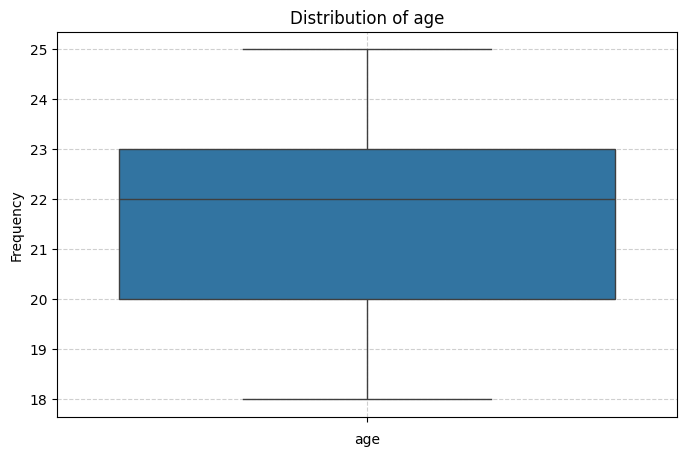

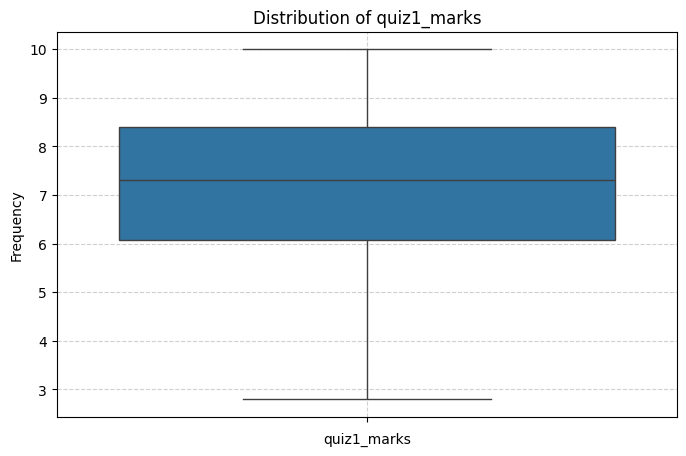

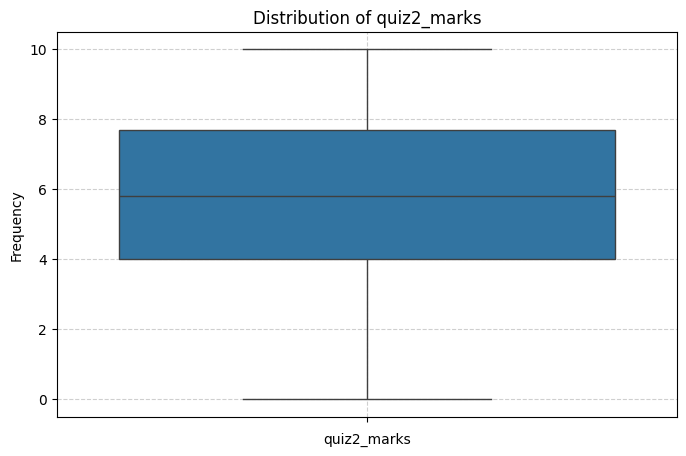

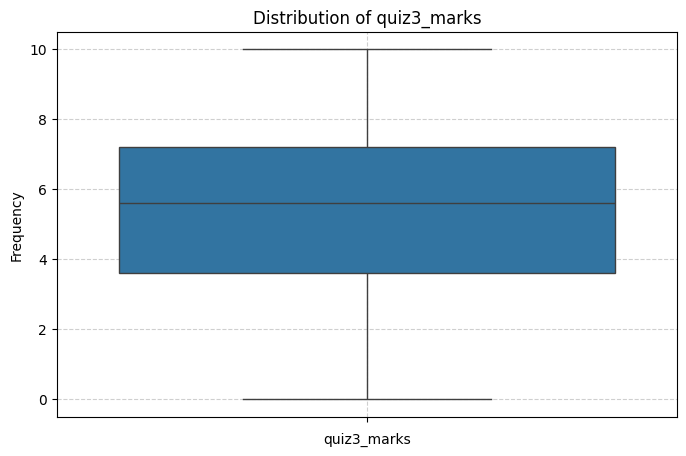

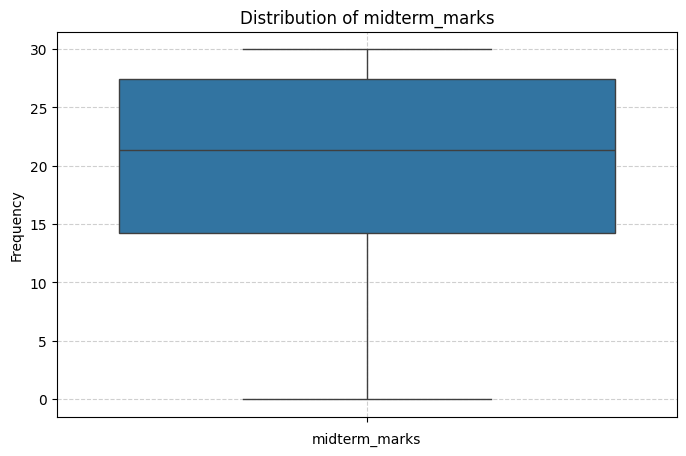

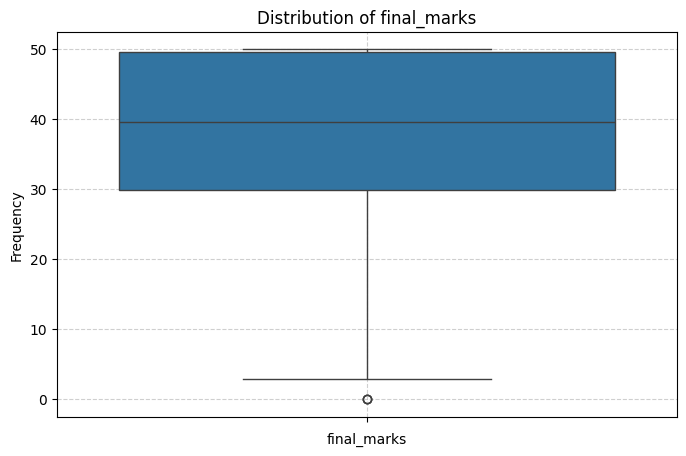

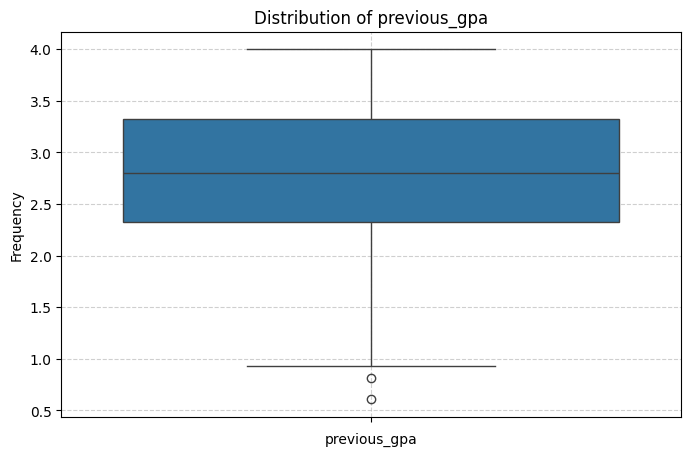

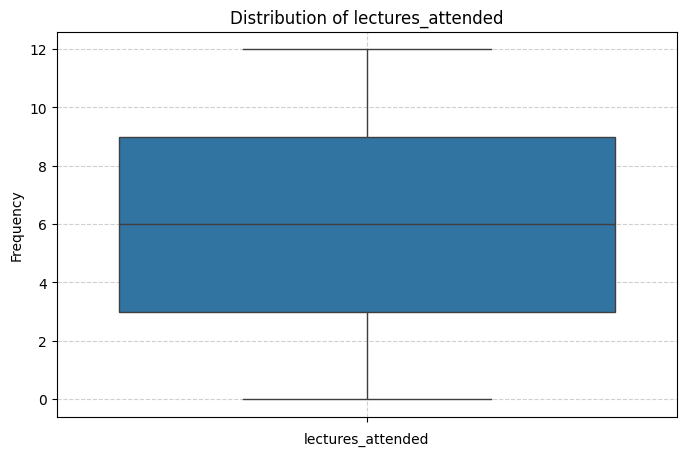

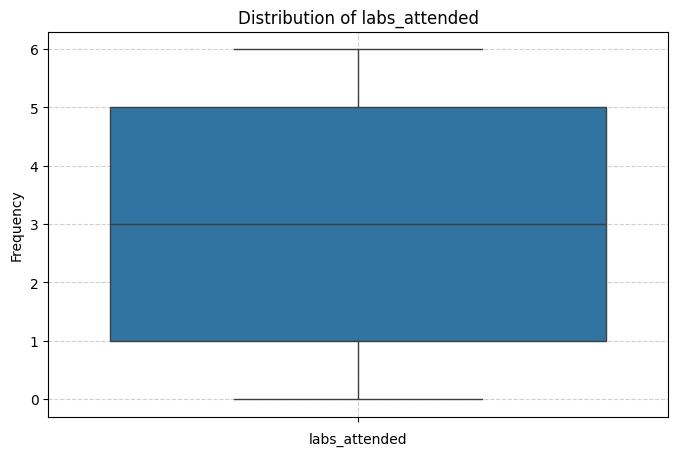

In [49]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Distribusi dari numerical kolom sangat baik, walau ada beberapa outlier pada final_marks dan previous_gpa dengan nilai yang rendah. Hal ini akan dapat membantu clustering untuk siswa yang memiliki resiko tinggi.

### Correlation Heatmap

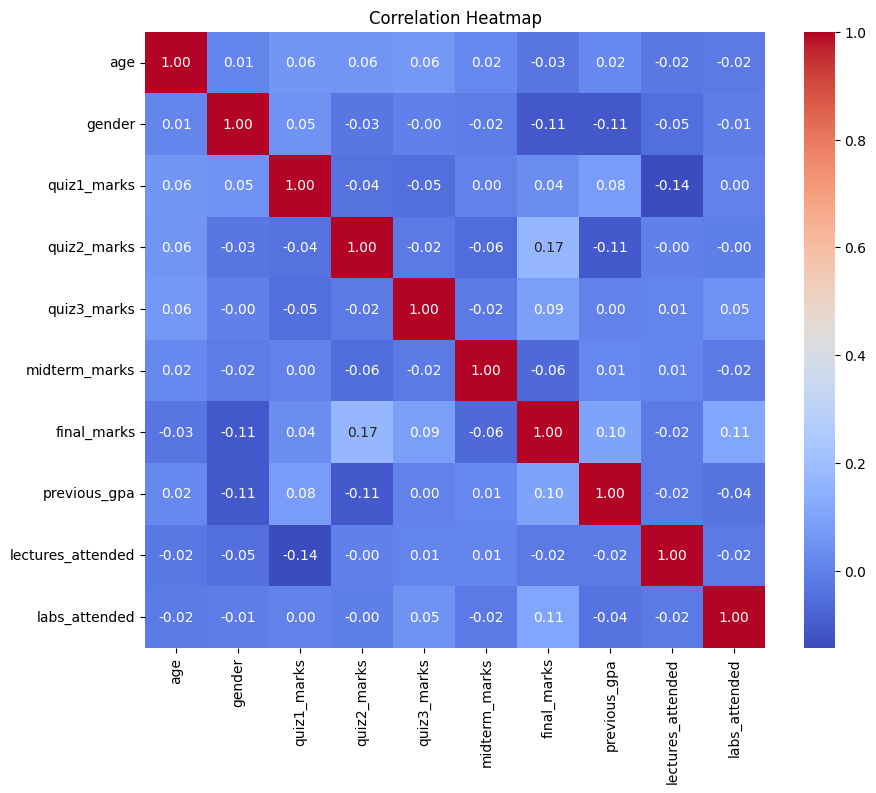

In [50]:
plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap tersebut dapat diketahui bahwa antar numerical variabel tidak memiliki korelasi yang tinggi yang menandakan adanya kemungkinan ketidaksesuaian dalam struktur assesment dan lecture yang diberikan

### Scatter Plot Attendance Rate

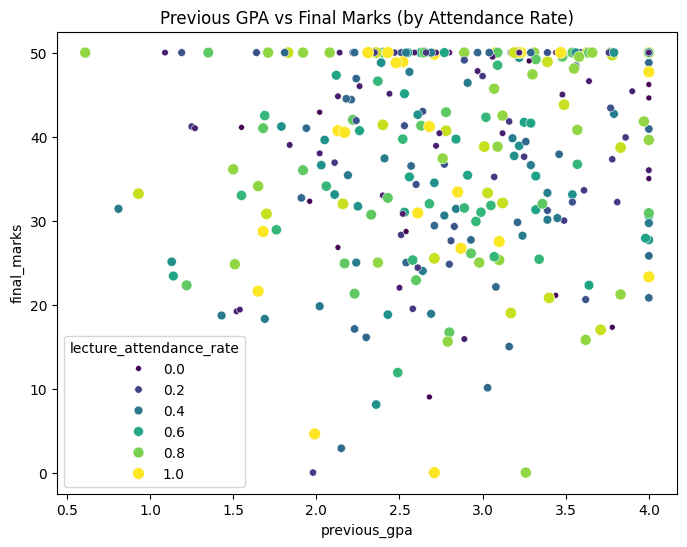

In [51]:
df['lecture_attendance_rate'] = df['lectures_attended'] / df['total_lectures']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='previous_gpa', y='final_marks',
                hue='lecture_attendance_rate', palette='viridis', size='lecture_attendance_rate')
plt.title('Previous GPA vs Final Marks (by Attendance Rate)')
plt.show()

Scatter plot tidak menunjukkan adanya trend linear antara final_marks dengan previous_gpa dari student dan plot ini memiliki pola sebaran yang acak, sehingga ini menunjukkan bahwa gpa sebelumnya bukanlah penentu dari keberhasilan pada nilai final. Namun, ada beberapa keanehan yaitu ada memiliki attendance rate rendah, tetap mendapatkan nilai akhir yang bagus.

## Data Transformation & PCA

### Data Standarization

In [52]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


### PRINCIPAL COMPONENT ANALYSIS


In [53]:
pca = PCA(n_components=10)

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]])

In [54]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

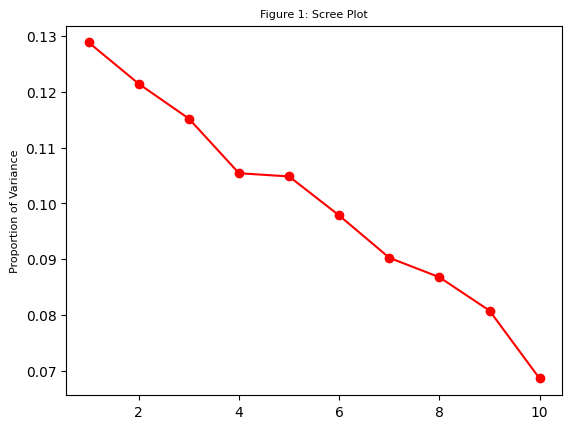

In [55]:
# Explained variance ratio for each component plot
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [56]:
# Explained variance ratio for each component and Cumulative variance
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the 8 principal components from PC01 until PC08 account for 85.06% of the variance in the data.

Since 85.06% is a considerable amount, it is sufficient to retain the eight principal components in the analysis.

In [36]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

Let’s store the component scores in a DataFrame and check it via the head() method!

In [57]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,0.855141
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,0.255126
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,-1.864242
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,0.528984
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,-0.855673


### PCA Visualization

In [58]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


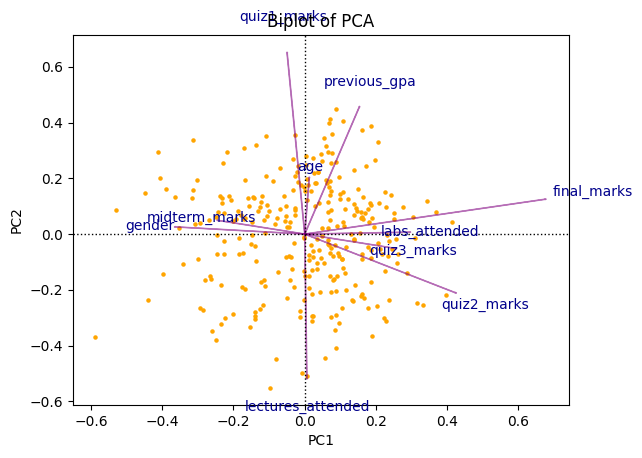

In [59]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

PC1 merepresentasikan final_marks atau nilai akhir. PC2 merepresentasikan nilai dari quiz 1 yang tinggi dan juga lectures_attended yang rendah.

Variabel terpenting:
1. PC1 : final_marks, quiz2_marks, labs_attended
2. PC2 : lectures_attended, quiz1_marks, previous_gpa

## Clustering

###  K-MEANS CLUSTERING

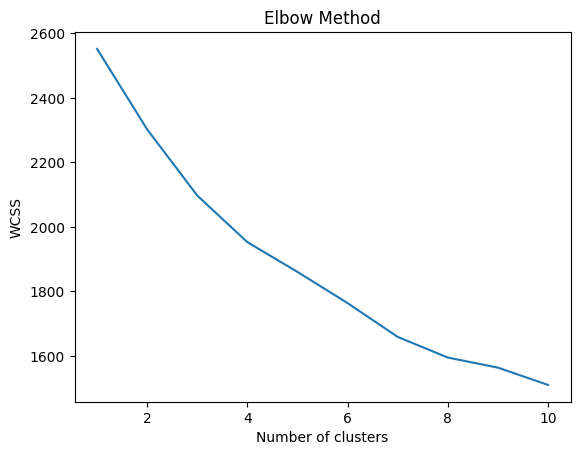

In [61]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


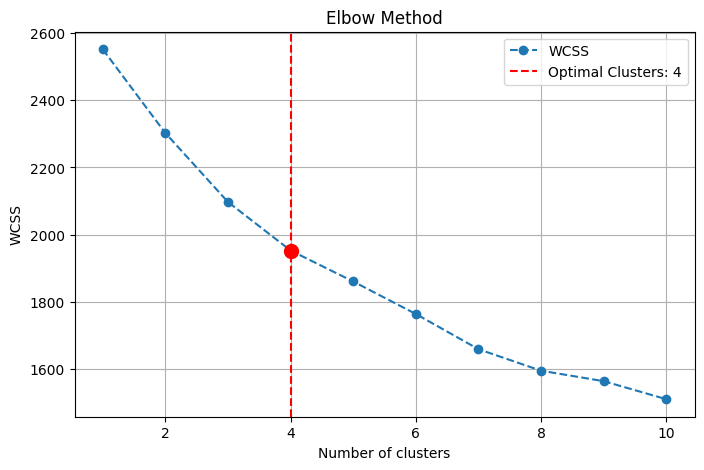

The optimal number of clusters is: 4


In [63]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [64]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [65]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10373863440575633


## Cluster Profiling & Educational Recommendations

In [67]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,lecture_attendance_rate,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,0.333333,3
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,0.083333,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,0.000000,3
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,0.750000,1
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0.583333,0


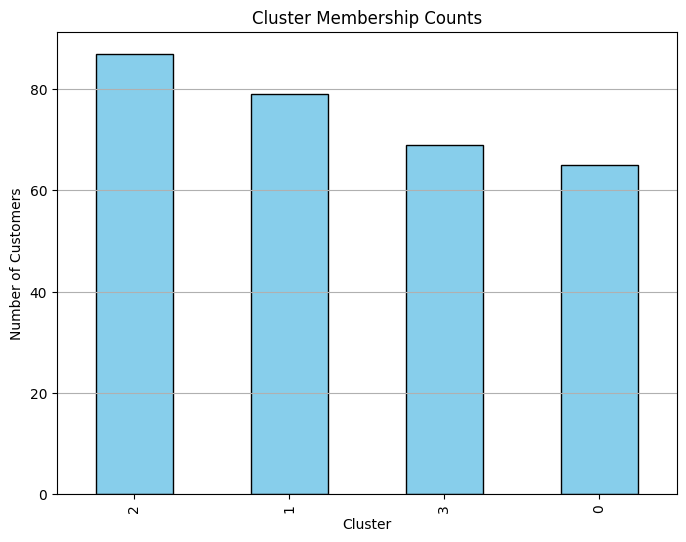

In [69]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [71]:
# Summary
cluster_profile_scaled = df.groupby('KMeans').mean(numeric_only=True).round(2)
print(cluster_profile_scaled)

        student_id    age  quiz1_marks  quiz2_marks  quiz3_marks  \
KMeans                                                             
0           139.26  20.35         6.50         6.44         4.01   
1           155.03  21.42         7.11         6.77         6.38   
2           153.89  22.89         7.68         5.52         6.87   
3           151.64  21.14         7.59         4.73         4.04   

        total_assignments  assignments_submitted  midterm_marks  final_marks  \
KMeans                                                                         
0                     5.0                    NaN          17.96        40.04   
1                     5.0                    NaN          14.01        40.71   
2                     5.0                    NaN          23.78        40.98   
3                     5.0                    NaN          23.88        26.51   

        previous_gpa  total_lectures  lectures_attended  total_lab_sessions  \
KMeans                         

### **Cluster Profiling**

1. **Cluster 0** : high attendance, high final marks, high previous GPA - diligent student

2. **Cluster 1** : low previous GPA and low quiz 2 marks, high final marks - incosistent student

3. **Cluster 2**: high final marks and previous GPA, low attendance - genius independent student

4. **Cluster 3**: high quiz 2 marks, but low final marks - burnout and high risk student

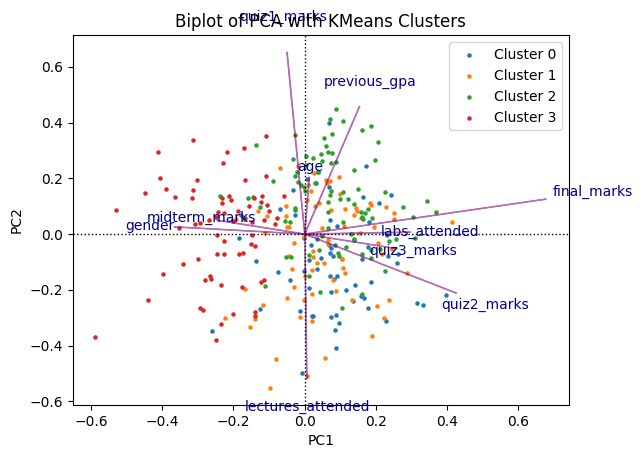

In [66]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

### **Interpretation via PCA Biplot**
1. **Orientasi Sumbu**

**Sumbu Horizontal (PC1)**: Bergerak dari Kiri ke Kanan.
* Kanan (Positif): Berkorelasi kuat dengan vektor final_marks dan quiz2_marks.
* Kiri (Negatif): Menandakan nilai akhir yang rendah.

**Sumbu Vertikal (PC2)**: Bergerak dari Atas ke Bawah.
* Atas (Positif): Berkorelasi dengan previous_gpa dan quiz1_marks.
* Bawah (Negatif): Berkorelasi kuat dengan lectures_attended


**2. Posisi Klaster dan Hubungannya dengan Variabel**

* Cluster 0 : Terkonsentrasi di Kuadran Kanan Bawah. Klaster ini ditarik ke bawah oleh variabel kehadiran. Ini memvalidasi profil mereka sebagai mahasiswa yang mencapai nilai lulus (kanan) melalui tingkat kehadiran yang sangat tinggi (bawah).

* Cluster 1 : Tersebar di area Tengah-Bawah. Mereka memiliki GPA masa lalu yang rendah (jauh dari panah GPA) dan kehadiran yang moderat (agak ke bawah), namun nilai akhirnya baik (berada di tengah-tengah PC1).

* Cluster 2 : Terkonsentrasi di Kuadran Kanan Atas. Posisi ini sangat jelas menggambarkan mahasiswa dengan GPA tinggi dan Nilai Akhir tinggi, namun memiliki tingkat kehadiran yang rendah (karena posisinya menjauhi panah kehadiran).

* Cluster 3 : Tersebar luas di sebelah Kiri (PC1 Negatif). Ini secara visual mengonfirmasi bahwa karakteristik utama kelompok ini adalah performa ujian akhir yang buruk, terlepas dari di mana posisi vertikal (GPA/Kehadiran) mereka. Mereka adalah kelompok yang "tertinggal" secara akademik di akhir semester.


### **Actionable Recommendations**

1. **Implementasi "Sistem Peringatan Dini" Pasca-UTS (Target: Cluster 3)**
* Analisis pada Cluster 3 menunjukkan fenomena kritis di mana mahasiswa memiliki nilai Midterm tertinggi, namun berakhir dengan Nilai Akhir terendah. Ini mengindikasikan bahwa drop-out atau kegagalan justru terjadi di paruh kedua semester.

* **Rekomendasi**: Jangan hanya memantau mahasiswa yang gagal ujian tengah semester. Sebaliknya, buat algoritma pemantauan otomatis untuk mahasiswa yang nilai Quiz 2 atau Quiz 3-nya turun lebih dari 20% dibandingkan nilai Midterm mereka. Wajibkan sesi konseling akademik atau bagi mahasiswa yang terdeteksi dalam pola ini untuk mencegah burnout sebelum Ujian Akhir (UAS).

2. **Kebijakan Presensi Fleksibel (Target: Cluster 2)**
* Biplot PCA menunjukkan bahwa vektor lectures_attended tegak lurus dengan final_marks, dan Cluster 2 terbukti meraih nilai tertinggi meskipun tingkat kehadirannya paling rendah. Ini membuktikan bahwa bagi kelompok ini, kehadiran fisik tidak berkorelasi dengan pemahaman materi.

* **Rekomendasi**: Ubah kebijakan "Wajib Hadir 75%" menjadi lebih adaptif. Izinkan mereka untuk tidak hadir di kelas reguler, namun ganti kewajiban tersebut dengan tugas berbasis proyek (Project-Based Learning) atau minta mereka menjadi Tutor Sebaya (Peer Tutors) untuk membantu mahasiswa di Cluster 0 dan 1. Ini meningkatkan keterlibatan mereka tanpa membuang waktu.

3. **Program Matrikulasi Intensif di Awal Semester (Target: Cluster 1)**
* Cluster 1 masuk ke perkuliahan dengan previous_gpa terendah dan nilai Midterm yang sangat buruk, meskipun akhirnya mereka berhasil lulus. Pola ini menunjukkan ketidaksiapan fondasi akademik di awal.

* **Rekomendasi**: Adakan program Matrikulasi/Remedial Wajib pada minggu ke-1 hingga ke-4 perkuliahan khusus untuk mahasiswa dengan GPA masuk di bawah 2.50. Program ini bertujuan untuk menguatkan konsep dasar sebelum materi menjadi terlalu kompleks.